# Analysis of the US farmland prices based on the historical data covering the last 50 years 

In [3]:
# Importing the required libraries and dependencies
import pandas as pd
from pathlib import Path
import datetime as dt
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'fbprophet'

In [4]:
# Loading national_price_per_acre.csv file from data folder
price_per_acre_df= pd.read_csv(
    Path("./data/national_price_per_acre.csv"),
    index_col= "year",
    parse_dates=True,
    infer_datetime_format= True)

price_per_acre_df.head()

,price_per_acre
year,
1970-01-01,196
1971-01-01,203
1972-01-01,219
1973-01-01,246
1974-01-01,302


In [5]:
# Calculating annual returns of the US farmland
annual_returns= price_per_acre_df.pct_change().dropna()
annual_returns.head()

,price_per_acre
year,
1971-01-01,0.035714
1972-01-01,0.078818
1973-01-01,0.123288
1974-01-01,0.227642
1975-01-01,0.125828


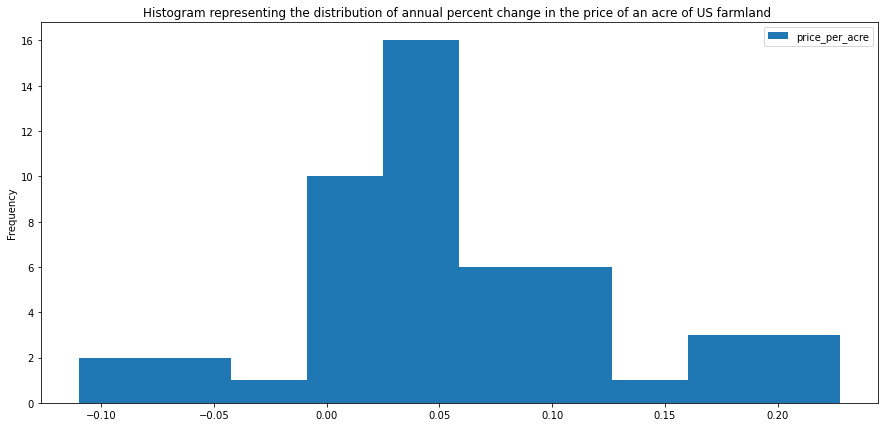

In [12]:
# Visualising distribution of annual percent change in prices of US farmland prices using histogram
annual_returns.plot(kind= "hist", figsize= (15,7), title= "Histogram representing the distribution of annual percent change in the price of an acre of US farmland ")

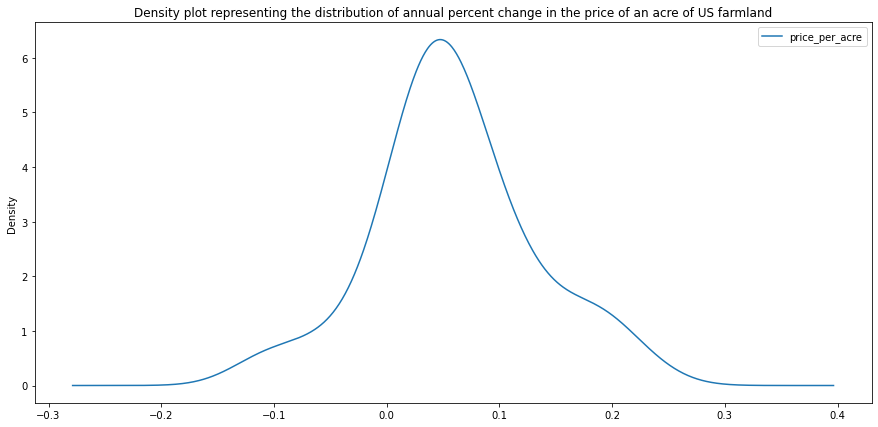

In [14]:
# Density plot
annual_returns.plot.density( figsize= (15,7),title= "Density plot representing the distribution of annual percent change in the price of an acre of US farmland")

In [15]:
# Calculating cumulative returns of the US farmland
cumulative_returns= (1 + annual_returns).cumprod()

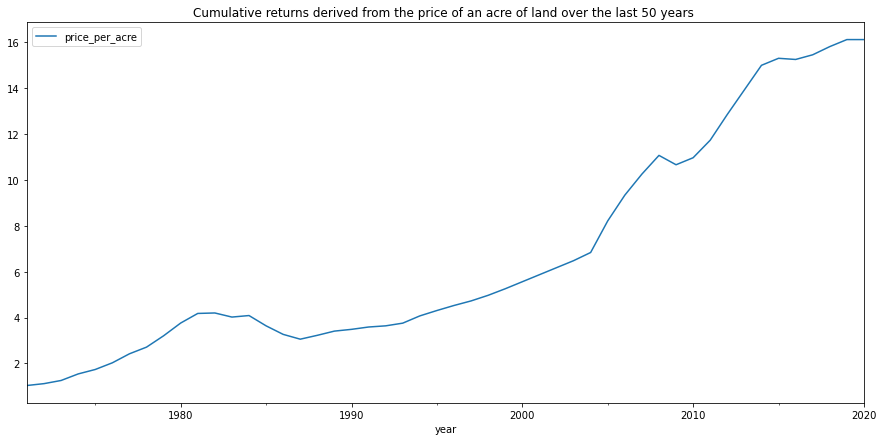

In [16]:
# Visualising cumulative returns
cumulative_returns.plot(figsize=(15,7), title= "Cumulative returns derived from the price of an acre of land over the last 50 years ")

In [9]:
# Generating summary statistics
summary_statistics= annual_returns.describe()
summary_statistics

,price_per_acre
count,50.000000
mean,0.059526
std,0.071188
min,-0.109863
25%,0.020920
50%,0.055069
75%,0.092799
max,0.227642


In [18]:
lower_bound= (summary_statistics.iloc[1] - (1.96 * summary_statistics.iloc[4])) *100
upper_bound= (summary_statistics.iloc[1] + (1.96 * summary_statistics.iloc[4])) *100
display(lower_bound)
display(upper_bound)

price_per_acre    1.852306
dtype: float64

price_per_acre    10.052905
dtype: float64

### From the analysis of the US farmland historical annual return data, with a 95% confidence interval we can expect our annual return value to fall between 1.85% and 10.05%

# Time Series Analysis of the US farmland pricing using Prophet

In [10]:
from IPython.display import clear_output
try:
  !pip install pystan
  !pip install fbprophet
except:
  print("Error installing facebook prophet")
finally:
  clear_output()
  print('Facebook Prophet was successfully installed')

Facebook Prophet was successfully installed


In [ ]:
price_per_acre_df= price_per_acre_df.reset_index()
price_per_acre_df.head()

In [ ]:
# Rename the columns to the Prophet model syntax 
price_per_acre_df = price_per_acre_df.rename(columns={"year":"ds", "price_per_acre":"y"})

# Review the DataFrame
price_per_acre_df.head()

In [ ]:
# Creating a Prophet model for the price prediction
model = Prophet()

In [ ]:
# Fitting the Prophet model
model.fit(price_per_acre_df)

In [ ]:
# Forecast 50 years of yearly future trends data 
future_farmland_prices = model.make_future_dataframe(periods=100, freq="Y")

# Display the last five rows of the future_farmland_prices DataFrame
future_farmland_prices.tail()

In [ ]:
# Making predictions using the future_farmland_prices DataFrame
forecast_farmland_prices = model.predict(future_farmland_prices)

# Display the first five rows of the forecast_farmland_prices DataFrame
forecast_farmland_prices.head()

In [ ]:
# Ploting the Prophet predictions  
model.plot(forecast_farmland_prices)

In [ ]:
# Setting the index in the forecast_farmland_prices DataFrame to the ds datetime column 
forecast_farmland_prices = forecast_farmland_prices.set_index('ds')

# Display the forecast_canada DataFrame
forecast_farmland_prices.head()



In [ ]:
# Plot predictions for our forecast_farmland_prices DataFrame for the 50 year period 
forecast_farmland_prices[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-50:,:].plot(title= "Forcast of the US farmland prices (in USD)")



In [ ]:
# Reseting the index in the forecast_farmland_prices DataFrame
forecast_farmland_prices = forecast_farmland_prices.reset_index()

# Using the plot_components function to visualize the forecast results 

fig = model.plot_components(forecast_farmland_prices)